### Object Classification and Identification using Active Contouring and CNN

In [27]:
#Based on the following tutorial
# Importing necessary libraries

#!pip install gradio
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import io
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import os, random
import warnings
warnings.filterwarnings("ignore")
import gradio as gr

import tensorflow.keras as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Flatten , Dense, Dropout , MaxPool2D
from keras.models import load_model


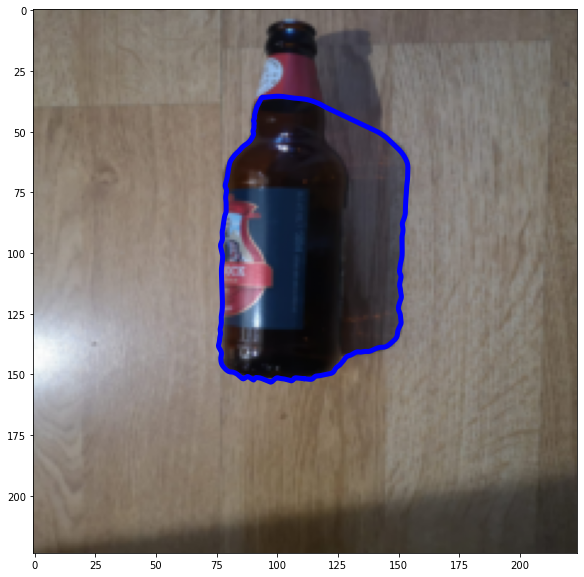

In [32]:
def classify_and_localise(image):
    warnings.filterwarnings("ignore")
    #Localise the image using Active Contouring
    image_resize = resize(image, (224,224), anti_aliasing=True)
    image_gray = rgb2gray(image_resize)
    # Applying Gaussian Filter to remove noise
    image_gray_smoothed = gaussian(image_gray, 4)
    image_gray_smoothed = image_gray
    # Localising the circle's center at 112, 112 with radius 112
    x1 = 112 + 112*np.cos(np.linspace(0, 2*np.pi, 500))
    x2 = 112 + 112*np.sin(np.linspace(0, 2*np.pi, 500))
    # Generating a circle based on x1, x2
    snake = np.array([x1, x2]).T
    object_snake = active_contour(image_gray_smoothed,snake, alpha=0.5, beta=0.1, w_line=0, w_edge=1, gamma=0.01, max_px_move=1.0, max_iterations=2500, convergence=0.1, boundary_condition='periodic', coordinates='rc')
    fig = plt.figure(figsize=(10, 10))

    # Adding subplots to display the markers
    ax = fig.add_subplot(111)
    
    # Plotting sample image
    ax.imshow(image_resize)
    
    # Plotting the face boundary marker
    ax.plot(object_snake[:, 1],
            object_snake[:, 0],
            '-b', lw=5)
    


    #pass image through CNN to get class
    image2 = tf.image.resize(image,size = (224,224))
    image_reshape = np.expand_dims(image2, axis=0)
    image_preprocessed = tf.keras.applications.resnet50.preprocess_input(image_reshape.copy())
  
    model = load_model("bestmodel.h5")
    classification = model.predict(image_preprocessed)
    classes = ['battery','biological','brown-glass','cardboard','clothes','green-glass','metal','paper','plastic','shoes','trash','white-glass']
    
    classification_label = classes[np.argmax(classification)]


    return classification_label, plt.gcf()


      

In [31]:
title = "Garbage_Classification"
description = "Demo for Garbage Classification and Localisation. Upload your own image and click " \
              "\"Submit\" "
io = gr.Interface(classify_and_localise, inputs=gr.inputs.Image(),
                  outputs = ["text","plot"],
                  title=title, description=description,
                  allow_flagging=False, allow_screenshot=False)
io.launch()

Running on local URL:  http://127.0.0.1:7866/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x2e506928e80>,
 'http://127.0.0.1:7866/',
 None)